In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t
from scipy.stats import norm
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import io
import requests

import traceback

1. Загрузите файл  HR.csv в pandas dataframe

In [2]:
url="https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, макс/мин, среднее отклонение)

In [3]:
#from pandas.core.reshape.pivot import pivot_table
df.info()
df.describe()
df.mode()
#stats =pd.pivot_table(df, values = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company'], index = ['left'], aggfunc={'satisfaction_level': [min, max, np.mean, np.median, np.std],
#                             'last_evaluation': [min, max, np.mean, np.median, np.std], 'average_montly_hours' : [min, max, np.mean, np.median, np.std], 'time_spend_company': [min, max, np.mean, np.median, np.std]})


#или подольше, но почитабельнее
stat={}
column_data=['satisfaction_level', #? он ведь количественный, не качественный
             'last_evaluation',
             'number_project',
             'average_montly_hours',
             'time_spend_company'
            ]
index_data=[]
average_data=[]
median_data=[]
mode_data=[]
max_data=[]
min_data=[]
std_data=[]
for name in column_data:
    if df[name].dtypes != object:
        index_data.append( name )
        average_data.append( statistics.mean(df[name]) )
        median_data.append( statistics.median(df[name]) )
        try:
            mode_data.append( statistics.mode(df[name]) )
        except:
            check={}
            for i in df[name]:
                if i not in check:
                    check[i] = 1
                else:
                    check[i] += 1
            maxp = 0
            mode_duration = None
            for k, v in check.items():
                if maxp < v:
                    maxp = v
                    mode_duration = k
            mode_data.append( mode_duration )
        max_data.append( max(df[name]) ) 
        min_data.append( min(df[name]) )
        std_data.append( statistics.pstdev(df[name]) )

stat.setdefault( 'average', average_data )
stat.setdefault( 'median', median_data )
stat.setdefault( 'mode', mode_data )
stat.setdefault( 'max', max_data )
stat.setdefault( 'min', min_data )
stat.setdefault( 'std', std_data )

stats = pd.DataFrame(stat, index=index_data)
stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,average,median,mode,max,min,std
satisfaction_level,0.612834,0.64,0.10,1.0,0.09,0.248622
last_evaluation,0.716102,0.72,0.55,1.0,0.36,0.171163
number_project,3.803054,4.00,4.00,7.0,2.00,1.232551
average_montly_hours,201.050337,200.00,135.00,310.0,96.00,49.941434
time_spend_company,3.498233,3.00,3.00,10.0,2.00,1.460088


3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определить 2 самых скоррелированных и 2 наименее скоррелированных переменных

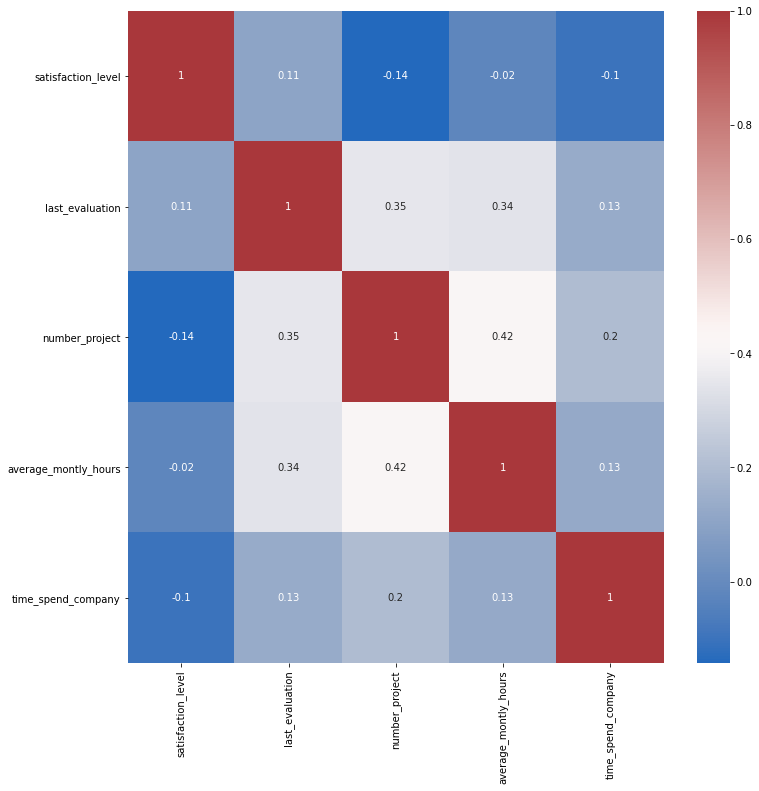

'\nКоличество проектов, выполненных за время работы коррелируют со средним количеством часов на рабочем месте в месяц (коэфф. корреляции 0,42),\nи со временем с последней оценки (0,35)\n\nОтрицательную корреляцию имеет уровень удовлетворённости работой с количеством выполненных проектов (-0.14) и со временем, проведённом в компании (-0.1)\n'

In [4]:
df_corr = df[:]
del df_corr['left']
del df_corr['Work_accident']
del df_corr['promotion_last_5years']
sns.heatmap(df_corr.corr(), annot=True, cmap='vlag')
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

"""
Количество проектов, выполненных за время работы коррелируют со средним количеством часов на рабочем месте в месяц (коэфф. корреляции 0,42),
и со временем с последней оценки (0,35)

Отрицательную корреляцию имеет уровень удовлетворённости работой с количеством выполненных проектов (-0.14) и со временем, проведённом в компании (-0.1)
"""

4. Рассчитать сколько сотрудников работает в каждом департаменте

In [6]:
def counter(data):
    return data.satisfaction_level.count()

print('Распределение сотудников по департаментам: \n', df.groupby('department').apply(counter))

#or
#df.groupby(['department']).size()

Распределение сотудников по департаментам: 
 department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


5. Показать распределение сотудников по зарплатам

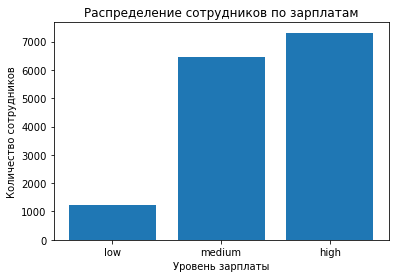

In [7]:
df_salaries = df.groupby('salary').apply(counter).sort_values()
r=['low', 'medium' ,'high']
plt.bar(r, df_salaries)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.show()

6. Показать распределение сотудников по зарплатам в каждом департаменте по отдельности

<AxesSubplot:xlabel='department', ylabel='count'>

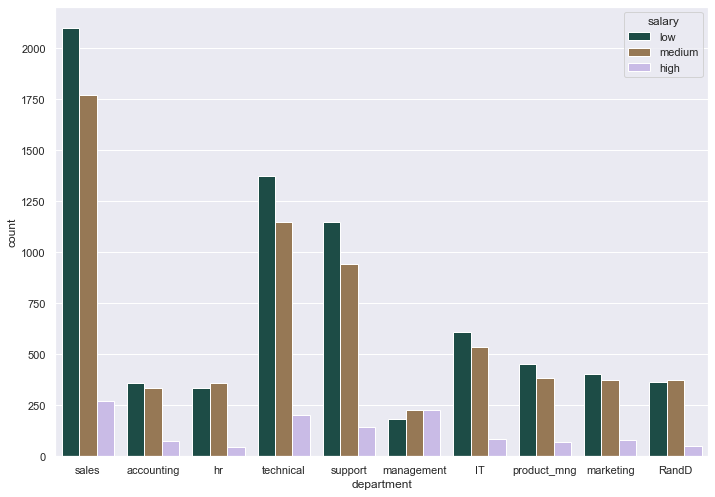

In [8]:
df_salaries_departments = df.groupby(['department','salary'])[['satisfaction_level']].apply(counter).reset_index()
#df_salaries_departments = df.groupby(['department','salary'])[['satisfaction_level']].count().reset_index()

#visual
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='department', hue='salary', data=df, palette = "cubehelix")

7. Проверить гипотезу что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [9]:
'''
T-test
Проверка нулевой гипотезы о том, что две независимые выборки имеют одинаковые средние значения
'''
from scipy import stats 

low_salary_time = df[df['salary'] == 'low']['average_montly_hours']
hi_salary_time = df[df['salary'] == 'high']['average_montly_hours']
stat, pval = stats.ttest_ind(low_salary_time, hi_salary_time)
print(f'T-test p-value {round(pval, 2)} > 0.1, мы не можем отвергнуть нулевую гипотезу о том что сотрудники с низким и высоким окладом проводят на работе одинаковое количество времени')

T-test p-value 0.47 > 0.1, мы не можем отвергнуть нулевую гипотезу о том что сотрудники с низким и высоким окладом проводят на работе одинаковое количество времени


/Users/nto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\nСкорее, можно разбить сотрудников на "вялых", "средних" и "упорных".\nСреди крайне неприходящих сотруднков категории "вялых" - те, кто проводят менее 100 часов в месяц на рабочем месте больше hi -получающих.\nНо если не брать крайние значения, то "вялые" в основном и мало получают.\n\n"Средние" сотрудники, проводящие на рабочем месте от 150 до 250 часов в месяц в основном живут с высокой зарплатой\n\n"Упорные" сотрудники могут получать неважно сколько, мало или много, сидят свыше 250 часов в неделю. Наверное просто их любви к искусству\n'

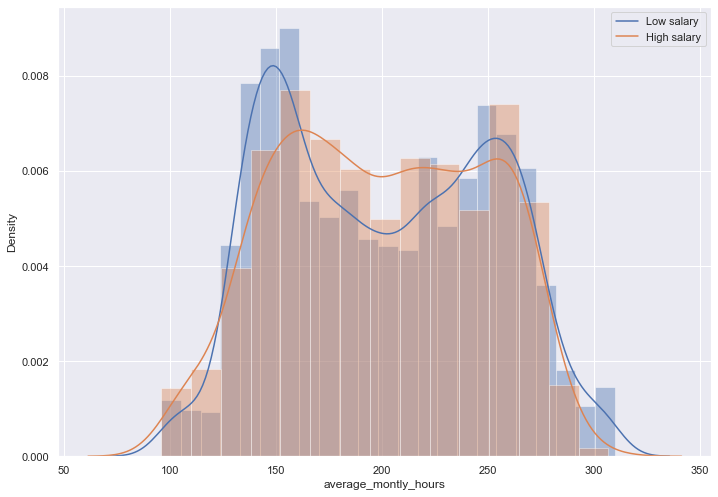

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.distplot(low_salary_time)
sns.distplot(hi_salary_time)

plt.legend(['Low salary', 'High salary'])

"""
Скорее, можно разбить сотрудников на "вялых", "средних" и "упорных".
Среди крайне неприходящих сотруднков категории "вялых" - те, кто проводят менее 100 часов в месяц на рабочем месте больше hi -получающих.
Но если не брать крайние значения, то "вялые" в основном и мало получают.

"Средние" сотрудники, проводящие на рабочем месте от 150 до 250 часов в месяц в основном живут с высокой зарплатой

"Упорные" сотрудники могут получать неважно сколько, мало или много, сидят свыше 250 часов в неделю. Наверное просто их любви к искусству
"""

<AxesSubplot:xlabel='department', ylabel='count'>

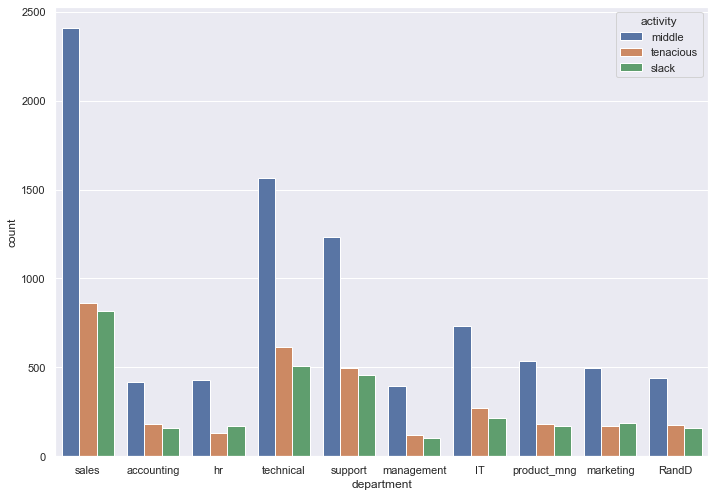

In [12]:
from locale import normalize
""" 
Было бы прикольно, посмотреть кто где сидит

"""

df.loc[ (df['average_montly_hours'] < 150), 'activity' ] = 'slack'
df.loc[ (df['average_montly_hours'] > 150) & (df['average_montly_hours'] < 250), 'activity' ] = 'middle'
df.loc[ (df['average_montly_hours'] > 250), 'activity'] = 'tenacious'

sns.countplot(data = df, x = 'department',  hue = 'activity')

#нормализовать данные, а то очень большой перекос salary
#df_2 = df.groupby( ['department', 'activity'] )['average_montly_hours'].value_counts(normalize = True)

8. Рассчитать следующие показатели среди уволившихся / среди не уволившихся сотрудников:

* доля сотрудников с повышением за последние 5 лет
* средняя степень удовлетворённости
* среднее количество проектов 

In [13]:
left = df[df['left'] == 1]['left'].count() #считаю 1 = да, уволился
alive = df[df['left'] == 0]['left'].count() # 0 = нет, не уволился

promoted_left = df[ (df['promotion_last_5years'] == 1) & (df['left'] == 1) ]['left'].count()
left_promoted_percnt = promoted_left/left

promoted_alive = df[ (df['promotion_last_5years'] == 1) & (df['left'] == 0)]['left'].count()
alive_promoted_percnt = promoted_alive/left

saticsfacted_left = df[ df['left'] == 1 ]['satisfaction_level'].mean()
saticsfacted_alive = df[ df['left'] == 0 ]['satisfaction_level'].mean()

projects_left = df[ df['left'] == 1 ]['number_project'].mode()[0]

projects_alive = df[ df['left'] == 0 ]['number_project'].mode()[0]



print(f'Уволившихся сотрудников - {left} голов, оставшихся - {alive}. \nСреди уволившихся было всего {left_promoted_percnt:.1%} сотрудников с повышением за последние 5 лет. \nСтепенью удовлетворённости работой по шкале от 0 до 1 у уволившихся всего {saticsfacted_left:.0}, а среднее количество проектов - {projects_left}')
print()
print(f'Люди, оставшиеся в кампании, имеют уровень удовлетворённрсти работой {saticsfacted_alive:.0} (максимальный уровень 1), среднее количество проектов - {projects_alive}. \nСреди оставшихся сотрудников {alive_promoted_percnt:.1%} имели повышение за последние 5 лет')

Уволившихся сотрудников - 3571 голов, оставшихся - 11428. 
Среди уволившихся было всего 0.5% сотрудников с повышением за последние 5 лет. 
Степенью удовлетворённости работой по шкале от 0 до 1 у уволившихся всего 0.4, а среднее количество проектов - 2

Люди, оставшиеся в кампании, имеют уровень удовлетворённрсти работой 0.7 (максимальный уровень 1), среднее количество проектов - 3. 
Среди оставшихся сотрудников 8.4% имели повышение за последние 5 лет


9.

* Разделить данные на тестовую и обучающие выборки;
* Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary);
* Оценить качество модели на тестовой выборке

In [14]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print( f'Средняя точность модели" {np.mean(scores):.1%}' )

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #ну да, как-то так

Средняя точность модели" 75.9%


0.763

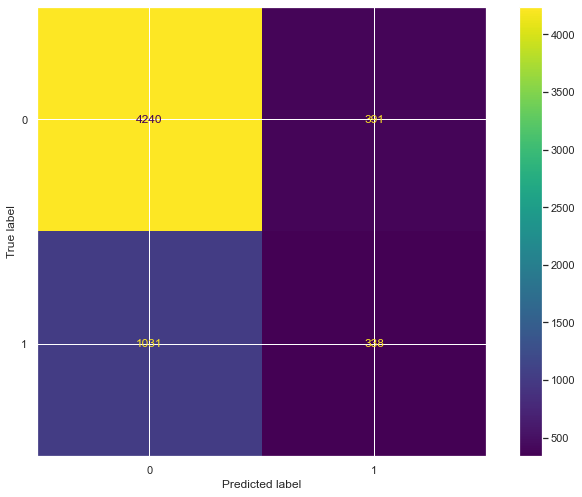

'\n4240 раз модель правильно определила что люди останутся, и 1031 раз определила что они остануться а они ушли\n    #как ни разбивай,разница между этими цифрами в 4 раза, люди могут уходить слишком непредсказуемо\n338 - правильно определила что люди уйдут, 391 раз - что они уйдут, на самом деле остались\n\nМодель стремиться оставить людей на рабочих местах (более точно определяет людей которые остаются)\n'

In [16]:
result = pd.DataFrame([y_test.values, y_pred])

from sklearn.metrics import confusion_matrix
from sklearn import metrics

res = confusion_matrix(y_test, y_pred)
res
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = res)

cm_display.plot()
plt.show()
"""
4240 раз модель правильно определила что люди останутся, и 1031 раз определила что они остануться а они ушли
    #как ни разбивай,разница между этими цифрами в 4 раза, люди могут уходить слишком непредсказуемо
338 - правильно определила что люди уйдут, 391 раз - что они уйдут, на самом деле остались

Модель стремиться оставить людей на рабочих местах (более точно определяет людей которые остаются)
"""

Text(0, 0.5, 'Среднее количество часов на рабочем месте в месяц')

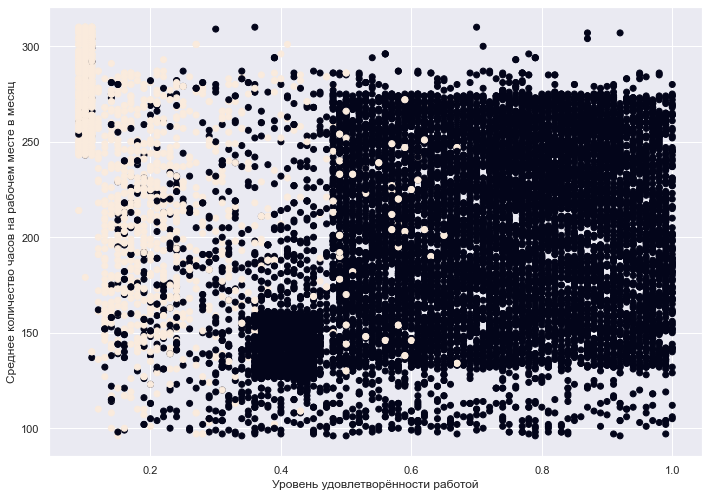

In [17]:
#ну можно глянуть как она распределяет уволившихся в зависимости от уровня удовлетворённости и времени на рабочем месте
X = df.drop(['department', 'salary', 'left', 'activity'], axis=1)
y = df['left']
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)

plt.scatter(X['satisfaction_level'], X['average_montly_hours'], c = model.predict(X))
plt.xlabel("Уровень удовлетворённости работой")
plt.ylabel("Среднее количество часов на рабочем месте в месяц")